In [9]:
import m2aia as m2
import numpy as np

from download_helper import DownloadMTBLS2639
file_names = DownloadMTBLS2639(selection=[2])


In [10]:
import m2aia as m2
from contextlib import contextmanager
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(19,6)})


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
imz = 190

start = time.time()
I = m2.ImzMLReader(file_names[0])
# I.SetNormalization(m2.m2NormalizationTIC)
I.Execute()
ys_1 = I.GetMeanSpectrum()
i_1 = I.GetArray(imz, 75)
print(time.time() - start,'s', "None")
xs = I.GetXAxis()

start = time.time()
I = m2.ImzMLReader(file_names[0])
# I.SetNormalization(m2.m2NormalizationTIC)
I.SetIntensityTransformation(m2.m2IntensityTransformationSquareRoot)
I.Execute()
ys_2 = I.GetMeanSpectrum()
i_2 = I.GetArray(imz, 75)
print(time.time() - start,'s', 'SR Transform')

start = time.time()
I = m2.ImzMLReader(file_names[0])
# I.SetNormalization(m2.m2NormalizationTIC)
I.SetIntensityTransformation(m2.m2IntensityTransformationSquareRoot)
I.SetSmoothing(m2.m2SmoothingGaussian,10)
I.Execute()
i_3 = I.GetArray(imz, 75)
ys_3 = I.GetMeanSpectrum()
print(time.time() - start,'s', 'Smoothing (hws 4), SR Transform')

start = time.time()
I = m2.ImzMLReader(file_names[0])
# I.SetNormalization(m2.m2NormalizationTIC)
I.SetIntensityTransformation(m2.m2IntensityTransformationSquareRoot)
I.SetSmoothing(m2.m2SmoothingGaussian,50)
I.Execute()
ys_4 = I.GetMeanSpectrum()
i_3 = I.GetArray(imz, 75)
print(time.time() - start,'s', 'Smoothing (hws 50), SR Transform')



0.7764842510223389 s None
0.7931537628173828 s SR Transform
2.4290618896484375 s Smoothing (hws 4), SR Transform
9.796247482299805 s Smoothing (hws 50), SR Transform


Intensities 29693
Intensities in m/z range 4582


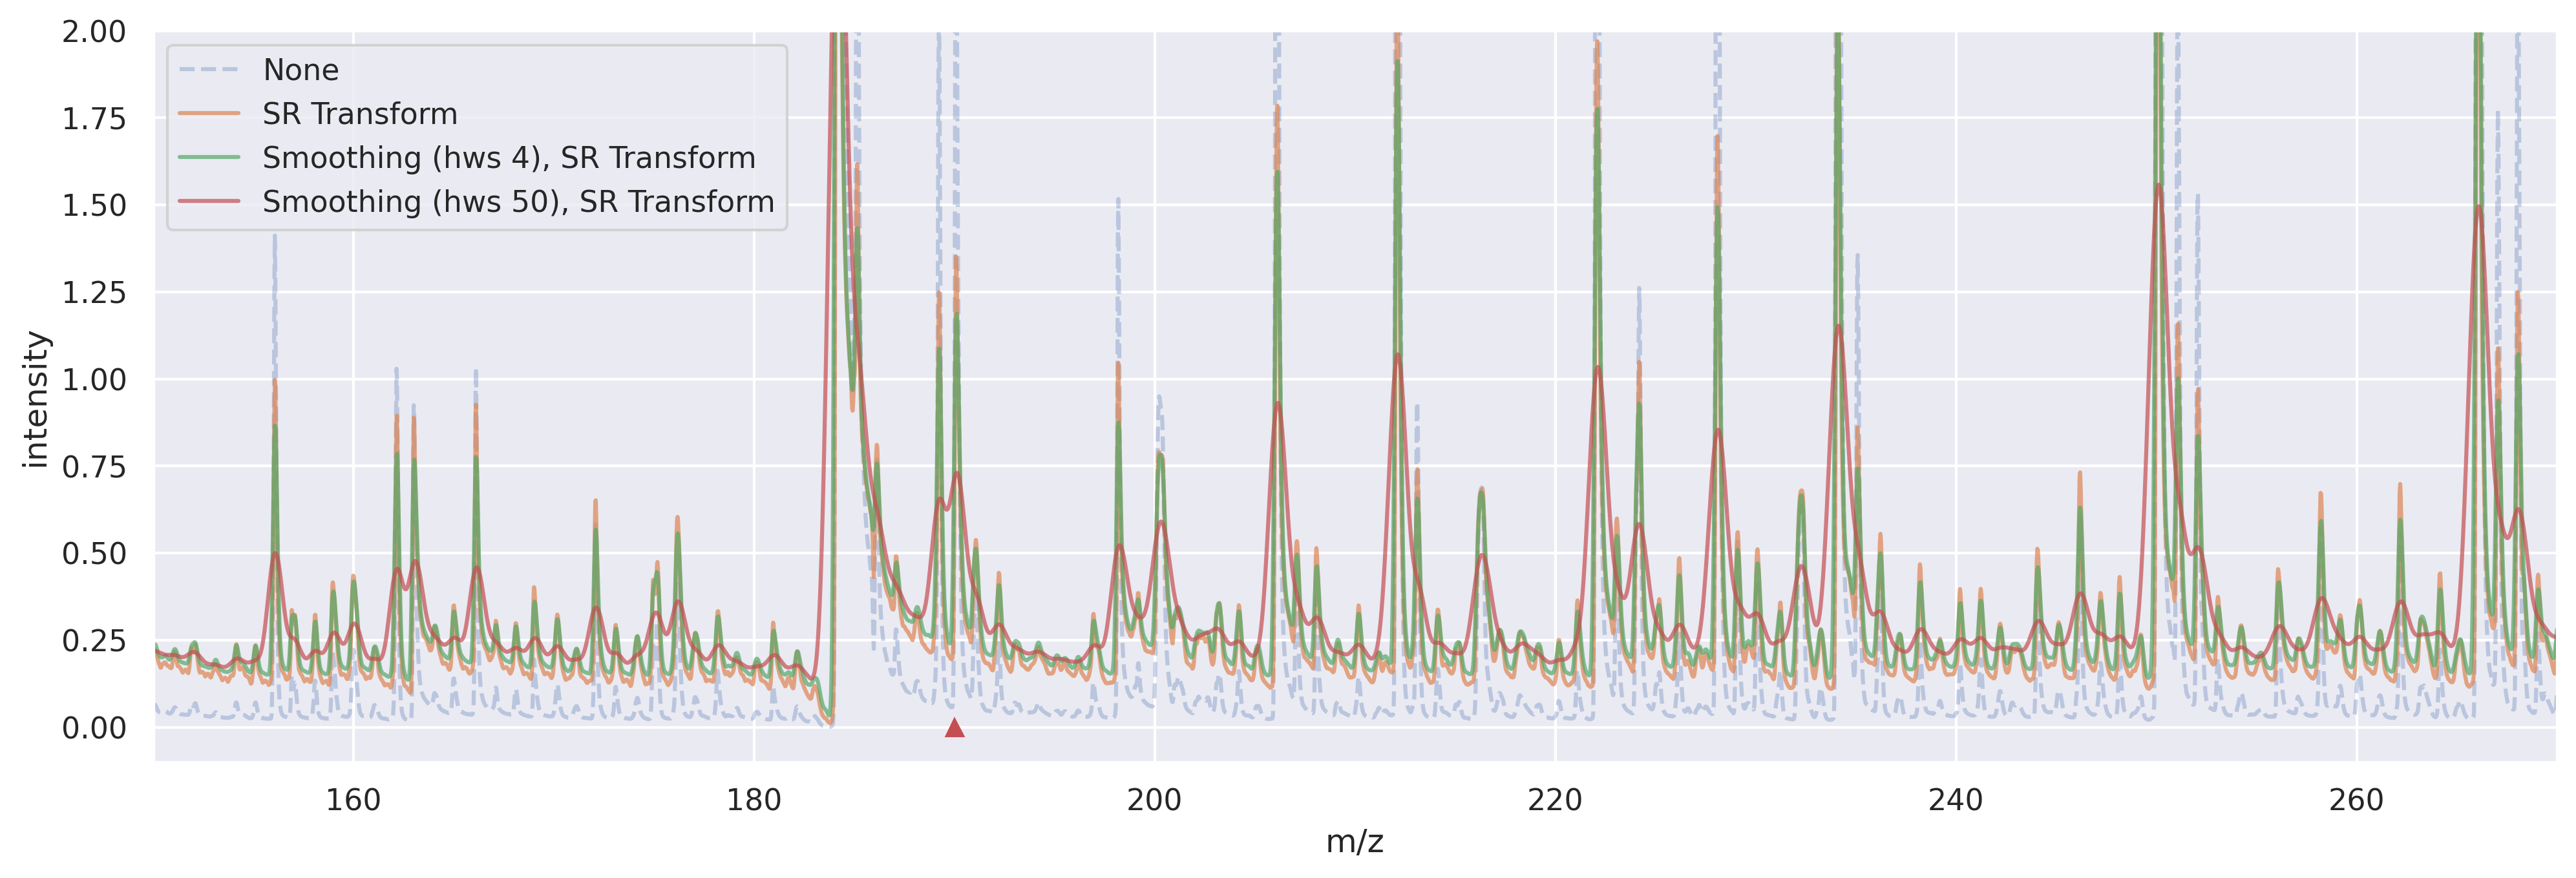

In [12]:
x_lim = [150,270]
plt.figure(figsize=(16,5), dpi=300)
# plt.gca().set_aspect(3)

plt.xlim(x_lim)
plt.ylim([-0.1,2])
plt.xlabel('m/z')
plt.ylabel('intensity')
plt.plot(xs, ys_1, '--',alpha=0.3)
plt.plot(xs, ys_2, alpha=0.7)
plt.plot(xs, ys_3, alpha=0.7)
plt.plot(xs, ys_4, alpha=0.7)
plt.plot(imz,0, 'r^')
plt.legend(['None', 'SR Transform', 'Smoothing (hws 4), SR Transform', 'Smoothing (hws 50), SR Transform'])
plt.savefig('Example_II.png', dpi=300)

print(f'Intensities', I.GetXAxisDepth())
print(f'Intensities in m/z range {np.sum(xs >= x_lim[0]) - np.sum(xs > x_lim[1])}')